<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/1D_Pressure_Diffusion_Numerical_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Solution of the 1D diffusivity Equation in an infinite domain. 

## Note that The P(x--> oo , t) Remains constant. Hence Infinite Acting. 

## Check for how fast and further the transient travels in a higher diffusivity (ex. higher perm) reservoir. 


Author : Divyanshu Vyas

Interests : Petroleum/Oil & Gas | Reservoir Engg. | Data Science/ML

Email : dvyas13ad@gmail.com

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import pylab as pl
from IPython import display
import time

# $ \frac {\partial^2 P} {\partial x^2} = 1/\eta \frac {\partial P} {\partial t} $

# $ \frac {\partial^2 P} {\partial x^2} - 1/\eta \frac {\partial P} {\partial t} = 0 $

# $ [\frac {\partial^2 } {\partial x^2} - 1/\eta \frac {\partial } {\partial t} ] [P] = [0] $

In [ ]:
# at x = 0 well is there q = KA/u * (-Pi+1 + P0)/dx

# P1 + qudx/kA

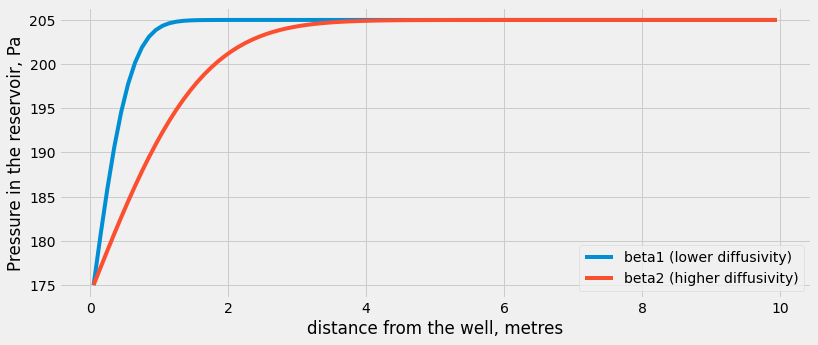

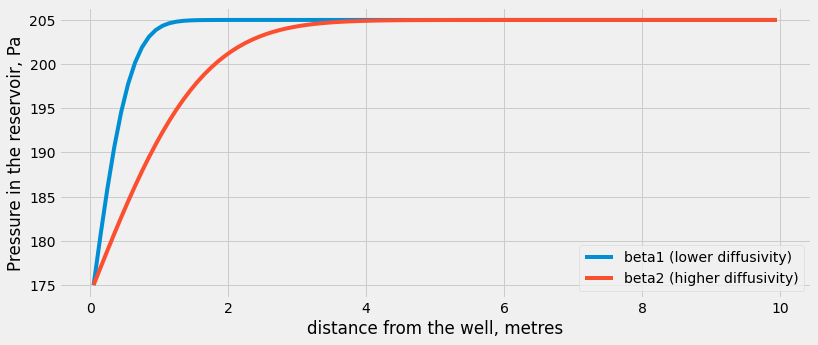

In [ ]:
k_md = 50
k_m2 = k_md*0.987E-15


phi = 0.25


ct_psi = 1E-03
ct_pa = ct_psi*14.7/101325


Mu_cp=3
Mu_Pas=Mu_cp*10**(-3)

diffusivity=k_m2/phi/Mu_Pas/ct_pa

q = 5 #bbls/day
q_m3persec = q/6.29/(24*60*60)

A = 5000 #m2

alpha = q_m3persec*Mu_Pas/(k_m2*A)


L = 10 #m

n = 100

dx = L/n

x = np.arange(dx/2,10, dx)


dt = 2
t = np.arange(0,181,dt)

beta1 = diffusivity*dt/dx**2

m = int(input('Enter The order you want to increase diffusivity with: '))
beta2 = m*beta1


P1 = np.ones(len(x))
P2 = np.ones(len(x))

Pi = 205
pw = 175  #pa

P1 = np.ones(len(x))*Pi
P2 = np.ones(len(x))*Pi



ax1 = plt.figure(figsize=(12,5))
plt.grid()
plt.style.use('fivethirtyeight')

# P1 = np.zeros(len(x))


for j in range(1,len(t)):

  plt.clf()

  for i in range(1,n-1):

    P1[i] = P1[i] + beta1*(P1[i+1] - 2*P1[i] + P1[i-1])

    P2[i] = P2[i] + beta2*(P2[i+1] - 2*P2[i] + P2[i-1])
  
  P1[0] = 175
  P1[n-1] = 205


  P2[0] = 175
  P2[n-1] = 205


  


  

  

  plt.plot(x,P1,label='beta1 (lower diffusivity)')
  plt.plot(x,P2,label='beta2 (higher diffusivity)')

  plt.xlabel('distance from the well, metres')
  plt.ylabel('Pressure in the reservoir, Pa')

  plt.legend(loc='best')



  display.clear_output(wait=True)
  display.display(pl.gcf())
  time.sleep(1.0)







